In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load data
mengambil data set lalu menampilkan 10 data

In [ ]:

df = pd.read_csv('diabetes2.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Pre-Processing


In [3]:
print("== PREPROSESING ==")

atribut = ['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
df[atribut] = df[atribut].apply(pd.to_numeric, errors='coerce')

# Representasi Jumlah Record Data
print("Representasi Jumlah Record:")
print("Jumlah record:", len(df))
print("Jumlah fitur:", df.shape[1])

# Jumlah Kelas (Outcome)
print("\na. Jumlah Kelas (Outcome):")
kelas_counts = df['Outcome'].value_counts().sort_index()
print(f"Kelas 0 = {kelas_counts.get(0, 0)} Negatif Diabetes")
print(f"Kelas 1 = {kelas_counts.get(1, 0)} Positif Diabetes")
print(f"Total semua kelas = {kelas_counts.sum()}")

# Jumlah Missing Value (nilai 0 dianggap missing)
print("\nb. Jumlah Missing Value (nilai 0 dianggap missing):")
missing_counts = (df[atribut] == 0).sum()
print(missing_counts.to_string())
print(f"\nTotal missing value dari semua kolom (bernilai 0): {missing_counts.sum()}")

== PREPROSESING ==
Representasi Jumlah Record:
Jumlah record: 768
Jumlah fitur: 9

a. Jumlah Kelas (Outcome):
Kelas 0 = 500 Negatif Diabetes
Kelas 1 = 268 Positif Diabetes
Total semua kelas = 768

b. Jumlah Missing Value (nilai 0 dianggap missing):
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0

Total missing value dari semua kolom (bernilai 0): 763


# Penanganan Missing Value

In [4]:
print("=== Penanganan Missing Value ===")

# Daftar kolom dengan missing value
missing_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti nilai 0 menjadi NaN hanya pada kolom yang dicek
df[missing_cols] = df[missing_cols].replace(0, np.nan)

missing_df = df.copy()

# Median
median_df = missing_df.copy()
median_values = median_df[missing_cols].median()
median_df[missing_cols] = median_df[missing_cols].fillna(median_values)
print("\n Median values yang digunakan:")
print(median_df[missing_cols].head(10))

# Simpan hasil imputasi ke file CSV
median_df.to_csv('diabetes_median_imputed.csv', index=False)


=== Penanganan Missing Value ===

 Median values yang digunakan:
   Glucose  BloodPressure  SkinThickness  Insulin   BMI
0    148.0           72.0           35.0    125.0  33.6
1     85.0           66.0           29.0    125.0  26.6
2    183.0           64.0           29.0    125.0  23.3
3     89.0           66.0           23.0     94.0  28.1
4    137.0           40.0           35.0    168.0  43.1
5    116.0           74.0           29.0    125.0  25.6
6     78.0           50.0           32.0     88.0  31.0
7    115.0           72.0           29.0    125.0  35.3
8    197.0           70.0           45.0    543.0  30.5
9    125.0           96.0           29.0    125.0  32.3


# SPLITING DATA

In [5]:

selected_features = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Misal X dan y dari hasil preprocessing
X = median_df[selected_features]
y = median_df['Outcome']

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data berhasil dibagi:")
print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji: {len(X_test)}")


Data berhasil dibagi:
Jumlah data latih: 614
Jumlah data uji: 154


# Smoting Data

In [6]:
print("Imbalance:")

print("Distribusi Awal (Sebelum SMOTE):")
print(pd.Series(y_train).value_counts())

# SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nHasil Imbalance SMOTE:")
print(pd.Series(y_train_sm).value_counts())

# Gabungkan hasil SMOTE ke dalam DataFrame baru
smote_df = pd.DataFrame(X_train_sm, columns=X.columns)
smote_df['Outcome'] = y_train_sm

# Simpan hasil ke file CSV
smote_df.to_csv('smote_resampled_data.csv', index=False)


Imbalance:
Distribusi Awal (Sebelum SMOTE):
Outcome
0    401
1    213
Name: count, dtype: int64

Hasil Imbalance SMOTE:
Outcome
0    401
1    401
Name: count, dtype: int64


In [7]:
#Melatih data model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
important_features = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("Fitur paling penting:\n", important_features)

Fitur paling penting:
 Glucose                     0.357487
BMI                         0.164377
Age                         0.131524
DiabetesPedigreeFunction    0.115416
Insulin                     0.087381
BloodPressure               0.079928
SkinThickness               0.035927
Pregnancies                 0.027960
dtype: float64


# Visualisasi Decisio Tree

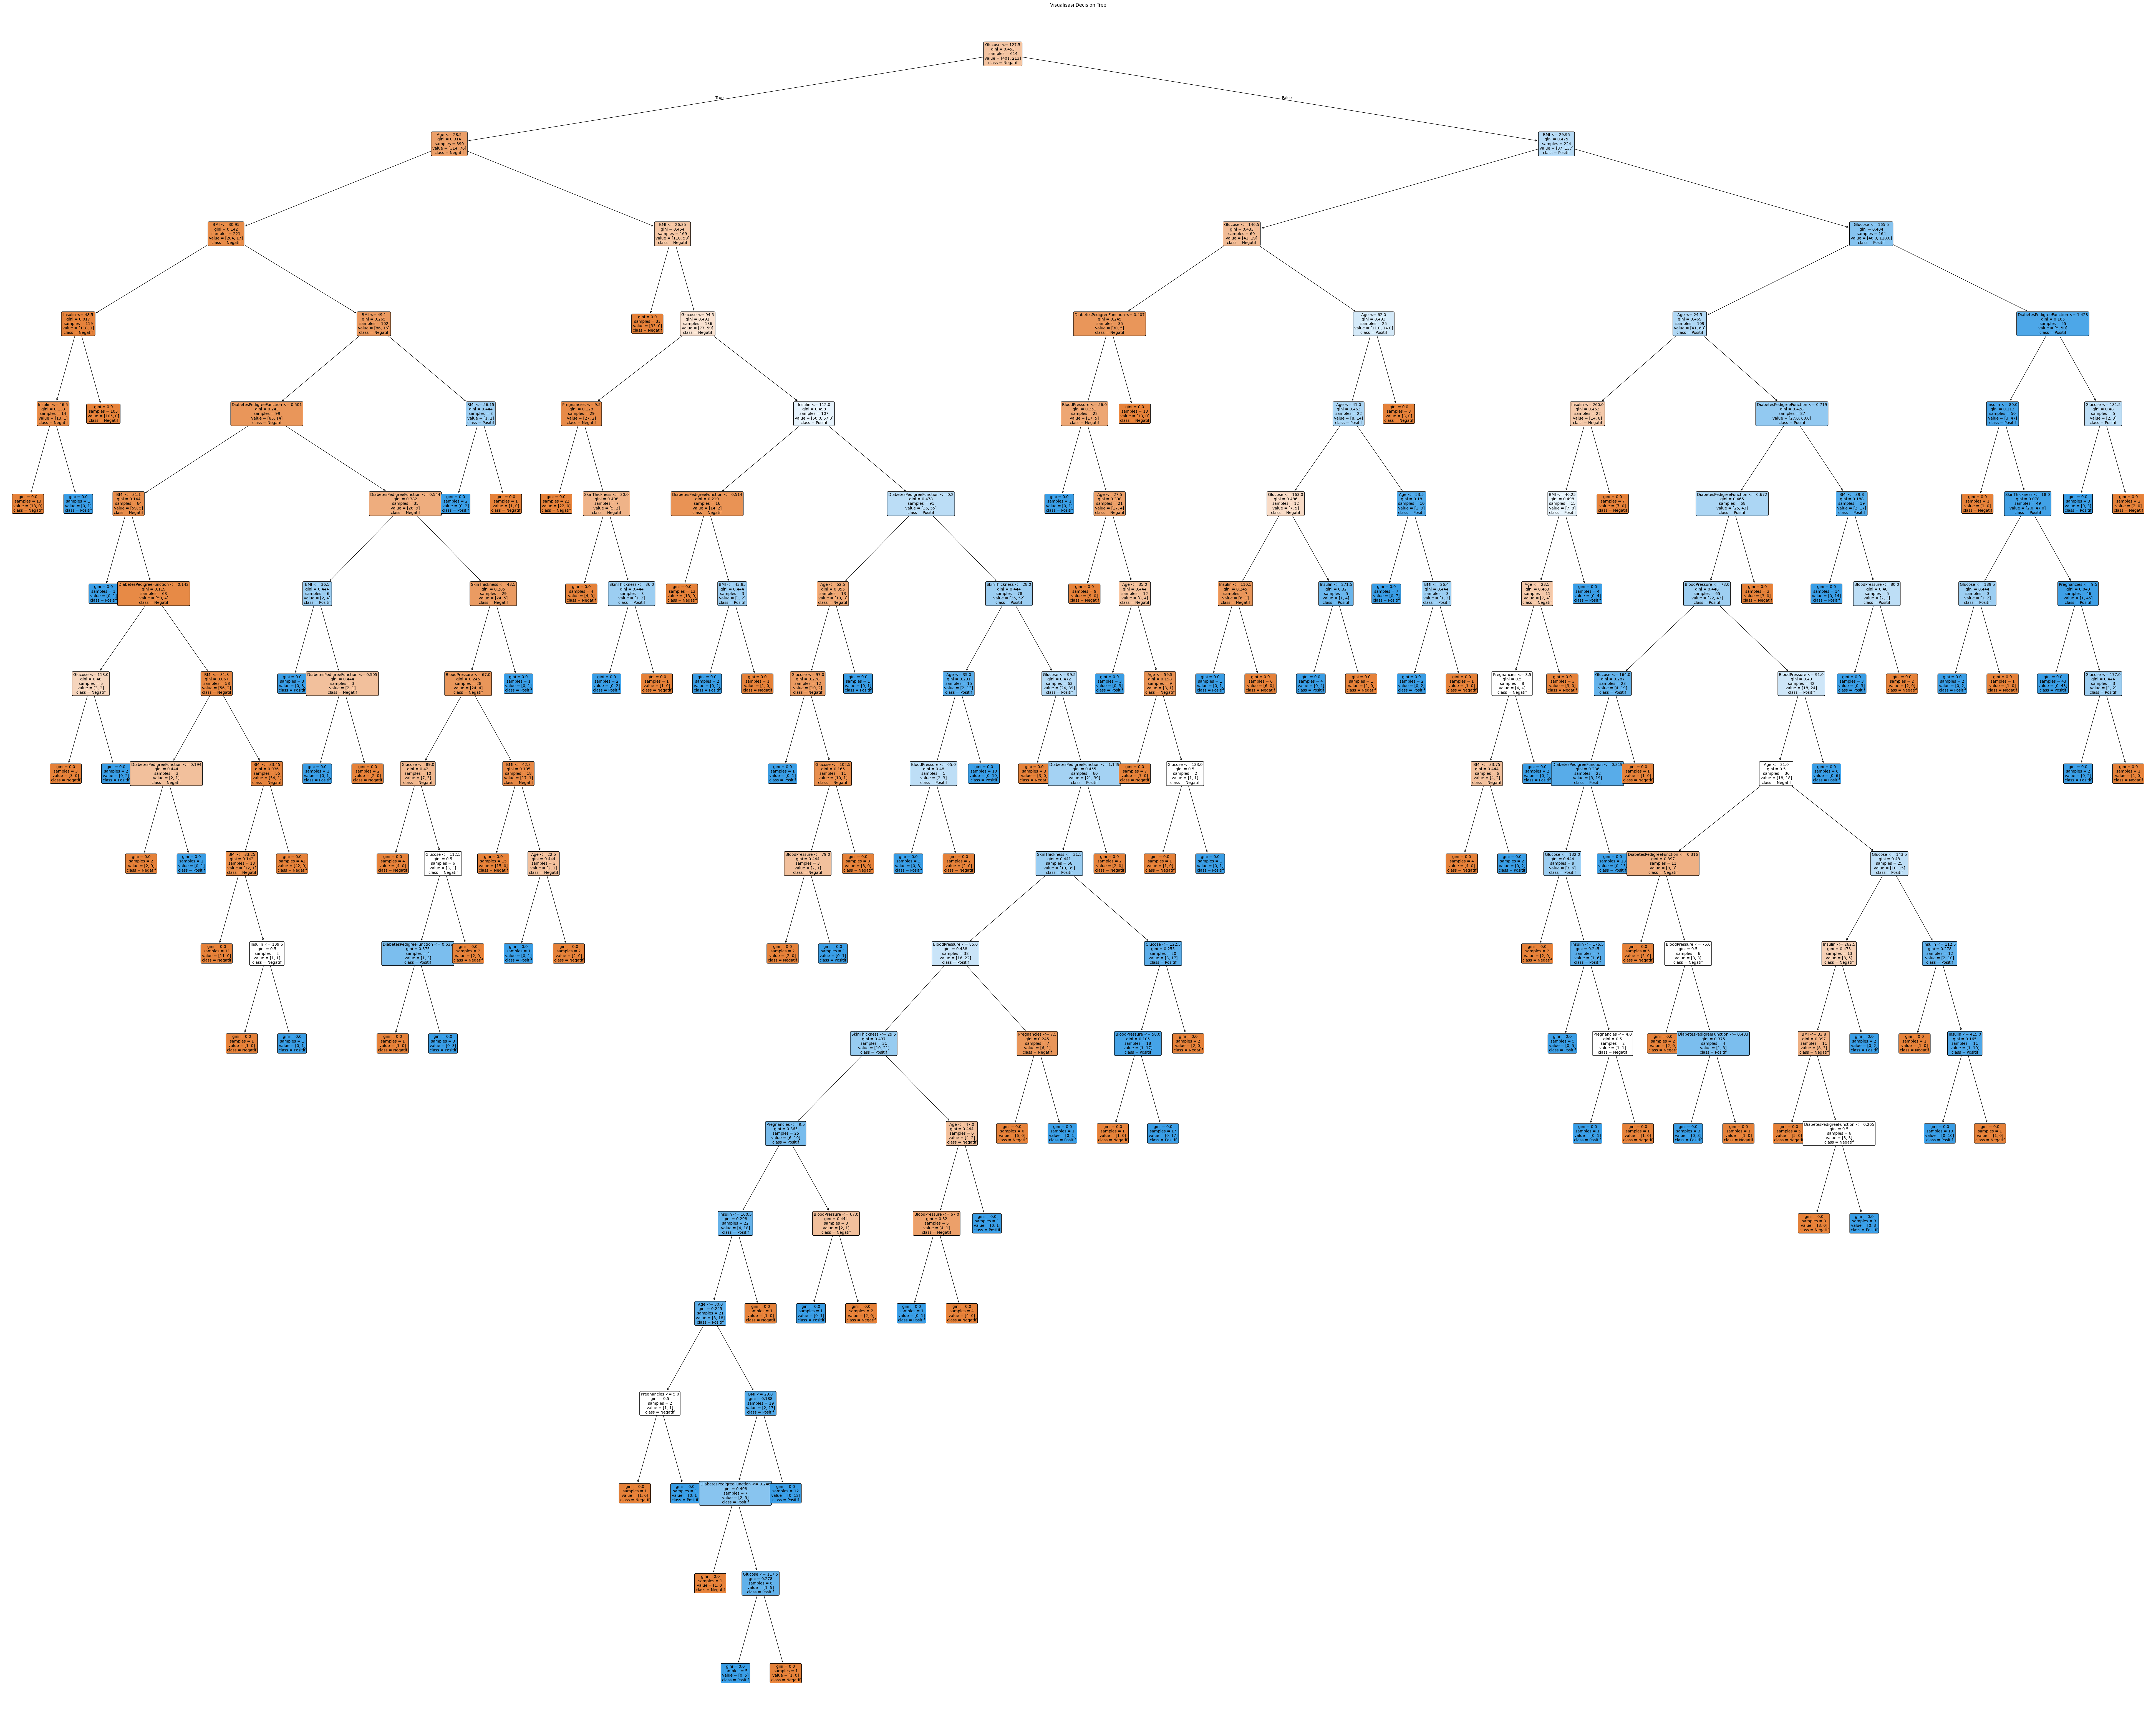

In [8]:
plt.figure(figsize=(100,80))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=["Negatif", "Positif"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualisasi Decision Tree")
plt.show()

# Prediksi dengan data uji dan Evaluasi

In [9]:
y_pred = model.predict(X_test)


print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.7207792207792207

Confusion Matrix:
 [[76 23]
 [20 35]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78        99
           1       0.60      0.64      0.62        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



# Visualisasi Confusion matrix

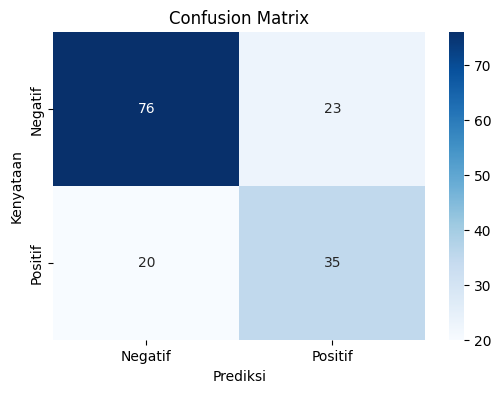

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Kenyataan')
plt.title('Confusion Matrix')
plt.show()

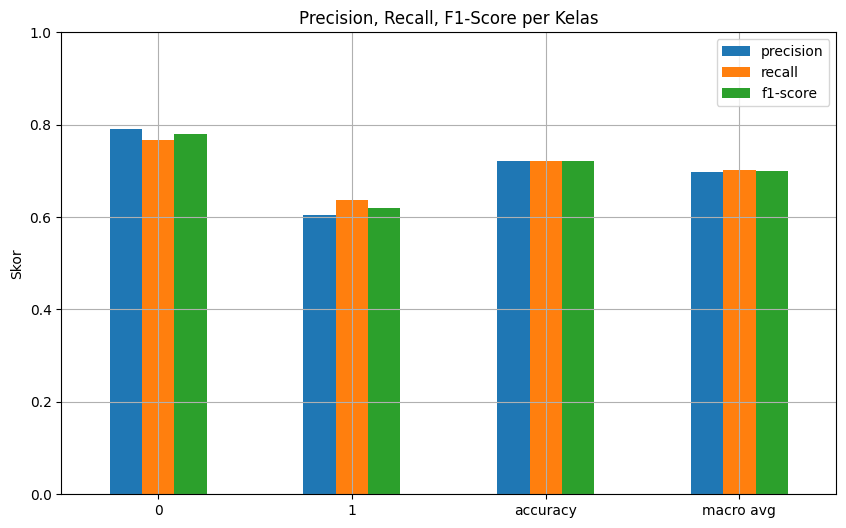

In [11]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()


df_report.iloc[:-1, :-1].plot(kind='bar', figsize=(10,6))
plt.title("Precision, Recall, F1-Score per Kelas")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# Modeling

In [12]:
# pip install joblib
from joblib import dump, load
# Simpan model
dump(model, 'model.pkl')
# Load model

['model.pkl']